### <span style="color:green">Step1. Creating street network object.</span>

In [1]:
import pandana, time, os, pandas as pd, numpy as np
from pandana.loaders import osm
import geopandas as gpd
import osmnx as ox
%matplotlib inline

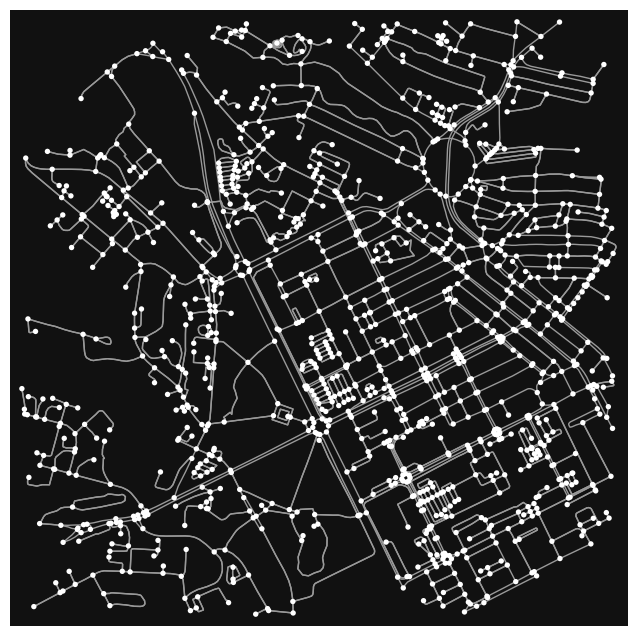

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
g = ox.graph_from_address('Nairobi, Nairobi County, Kenya')
ox.plot_graph(g)

### 



<span style="color:green">Step2. Locate Objects of Interest.</span>

In [3]:
from pandana.loaders import osm # import pandana

### <span style="color:green">Reading amenities and joining them.</span>

In [4]:
print("Loading Geopandas...\n")
import geopandas as gpd

filename_1 = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Proximity/amenities/green-spaces.gpkg"
filename_2 = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Proximity/amenities/primary-schools.gpkg"
filename_3 = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Proximity/amenities/health-facilities.gpkg"

Loading Geopandas...



In [5]:
# Read files
g_spaces = gpd.read_file(filename_1)
p_sch = gpd.read_file(filename_2)
h_faci = gpd.read_file(filename_3)

In [6]:
g_spaces.head(10)

,address,id,addresses,geometry
0,"Arboretum Drive, 00400, Nairobi, Nairobi, Kenya",5,"Nairobi Arboretum. Kileleshwa, Nairobi, Nairob...",MULTIPOINT (36.80422 -1.27692)
1,"UHURU PARK, Processional Way, 40476, Processio...",2,"Uhuru Park, Upper Hill, Nairobi, Nairobi Count...",MULTIPOINT (36.81654 -1.28955)
2,"Donald Car Park, Posta Street, 46464, Posta St...",3,"Central Park, Upper Hill, Nairobi, Nairobi Cou...",MULTIPOINT (36.81838 -1.28740)
3,"Peace Path, 46464, Nairobi, Nairobi, Kenya",4,"Peace Path, Chiromo, Nairobi, 46464, Kenya",MULTIPOINT (36.81602 -1.27494)
4,"Nairobi, Nairobi, Kenya",8,"Jeevanjee Gardens, Nairobi, Nairobi County, Kenya",MULTIPOINT (36.81724 -1.28325)
5,"Muthaiga, 00100, Nairobi, Nairobi, Kenya",9,"Middle Track, Muthaiga, Nairobi, 00800, Kenya",MULTIPOINT (36.83010 -1.25309)
6,"City Park Road, 00100, Nairobi, Nairobi, Kenya",6,"City Park, Pangani, Nairobi, Nairobi County, K...",MULTIPOINT (36.82990 -1.26241)


<Axes: >

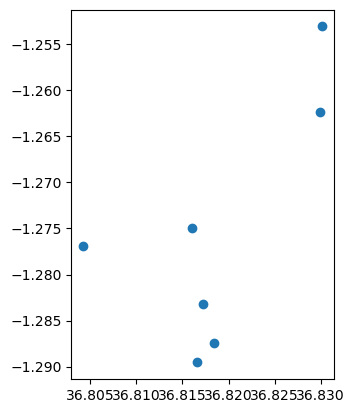

In [7]:
g_spaces.plot()

In [8]:
type(g_spaces.geometry)

geopandas.geoseries.GeoSeries

In [9]:
g_spaces.shape

(7, 4)

In [10]:
p_sch.head()

,NAME,geometry
0,ISANA PRI,MULTIPOINT (36.77630 -1.22016)
1,WINSONG COTTAGE PRI SCH,MULTIPOINT (36.77626 -1.21948)
2,MALGUTA ACADEMY,MULTIPOINT (36.77427 -1.22011)
3,LOWER KIHARA PRIMARY,MULTIPOINT (36.77263 -1.21781)
4,ANGELIC PREPARATORY,MULTIPOINT (36.76834 -1.21993)


<Axes: >

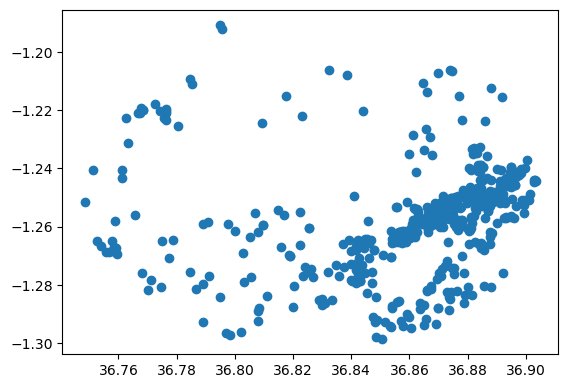

In [11]:
p_sch.plot()

In [12]:
p_sch.shape

(487, 2)

In [13]:
h_faci.head()

,HFName,geometry
0,KARURA SDA DISP,MULTIPOINT (36.78000 -1.22000)
1,LADY NORTH HEALTH CENTRE,MULTIPOINT (36.81064 -1.28551)
2,STATE HOUSE DISP,MULTIPOINT (36.79915 -1.28435)
3,STATE HOUSE ROAD DISP,MULTIPOINT (36.80337 -1.27623)
4,WESTLANDS DISP,MULTIPOINT (36.79847 -1.25851)


<Axes: >

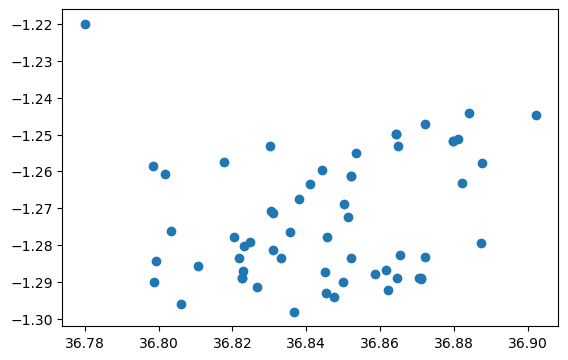

In [14]:
h_faci.plot(
    
)

### <span style="color:green">Renaming amenities.</span>

In [15]:
g_spaces.head()

,address,id,addresses,geometry
0,"Arboretum Drive, 00400, Nairobi, Nairobi, Kenya",5,"Nairobi Arboretum. Kileleshwa, Nairobi, Nairob...",MULTIPOINT (36.80422 -1.27692)
1,"UHURU PARK, Processional Way, 40476, Processio...",2,"Uhuru Park, Upper Hill, Nairobi, Nairobi Count...",MULTIPOINT (36.81654 -1.28955)
2,"Donald Car Park, Posta Street, 46464, Posta St...",3,"Central Park, Upper Hill, Nairobi, Nairobi Cou...",MULTIPOINT (36.81838 -1.28740)
3,"Peace Path, 46464, Nairobi, Nairobi, Kenya",4,"Peace Path, Chiromo, Nairobi, 46464, Kenya",MULTIPOINT (36.81602 -1.27494)
4,"Nairobi, Nairobi, Kenya",8,"Jeevanjee Gardens, Nairobi, Nairobi County, Kenya",MULTIPOINT (36.81724 -1.28325)


In [16]:
g_spaces_re = g_spaces.copy() # creating checkpoints
g_spaces_df = pd.DataFrame(g_spaces_re) # converting to pandas DataFrame
g_spaces_df = g_spaces_re.drop(['address', 'id'], axis=1) # dropping some columns

# Renaming the columns
g_spaces_df.columns = ['Name', 'geometry']

# convert to geodataframe
g_spaces_gdf = g_spaces_df.copy()
g_spaces_gdf = gpd.GeoDataFrame(g_spaces_gdf)
g_spaces_gdf.head()

,Name,geometry
0,"Nairobi Arboretum. Kileleshwa, Nairobi, Nairob...",MULTIPOINT (36.80422 -1.27692)
1,"Uhuru Park, Upper Hill, Nairobi, Nairobi Count...",MULTIPOINT (36.81654 -1.28955)
2,"Central Park, Upper Hill, Nairobi, Nairobi Cou...",MULTIPOINT (36.81838 -1.28740)
3,"Peace Path, Chiromo, Nairobi, 46464, Kenya",MULTIPOINT (36.81602 -1.27494)
4,"Jeevanjee Gardens, Nairobi, Nairobi County, Kenya",MULTIPOINT (36.81724 -1.28325)


In [17]:
p_sch.head()

,NAME,geometry
0,ISANA PRI,MULTIPOINT (36.77630 -1.22016)
1,WINSONG COTTAGE PRI SCH,MULTIPOINT (36.77626 -1.21948)
2,MALGUTA ACADEMY,MULTIPOINT (36.77427 -1.22011)
3,LOWER KIHARA PRIMARY,MULTIPOINT (36.77263 -1.21781)
4,ANGELIC PREPARATORY,MULTIPOINT (36.76834 -1.21993)


In [18]:
p_sch_re = p_sch.copy() # checkpoint
p_sch_df = pd.DataFrame(p_sch_re) # convert to Pandas DataFrame
p_sch_df.columns = ['Name', 'geometry'] # renaming columns

# convert to a geodataframe
p_sch_gdf = gpd.GeoDataFrame(p_sch_df)
p_sch_gdf.head()

,Name,geometry
0,ISANA PRI,MULTIPOINT (36.77630 -1.22016)
1,WINSONG COTTAGE PRI SCH,MULTIPOINT (36.77626 -1.21948)
2,MALGUTA ACADEMY,MULTIPOINT (36.77427 -1.22011)
3,LOWER KIHARA PRIMARY,MULTIPOINT (36.77263 -1.21781)
4,ANGELIC PREPARATORY,MULTIPOINT (36.76834 -1.21993)


In [19]:
h_faci.head()

,HFName,geometry
0,KARURA SDA DISP,MULTIPOINT (36.78000 -1.22000)
1,LADY NORTH HEALTH CENTRE,MULTIPOINT (36.81064 -1.28551)
2,STATE HOUSE DISP,MULTIPOINT (36.79915 -1.28435)
3,STATE HOUSE ROAD DISP,MULTIPOINT (36.80337 -1.27623)
4,WESTLANDS DISP,MULTIPOINT (36.79847 -1.25851)


In [20]:
h_faci_re = h_faci.copy() # checkpoint
h_faci_df = pd.DataFrame(h_faci_re) # Converting to Pandas DataFrame
h_faci_df.columns = ['Name', 'geometry']

# Convert back to geodataframe
h_faci_gdf = gpd.GeoDataFrame(h_faci_df)
h_faci_gdf.head()

,Name,geometry
0,KARURA SDA DISP,MULTIPOINT (36.78000 -1.22000)
1,LADY NORTH HEALTH CENTRE,MULTIPOINT (36.81064 -1.28551)
2,STATE HOUSE DISP,MULTIPOINT (36.79915 -1.28435)
3,STATE HOUSE ROAD DISP,MULTIPOINT (36.80337 -1.27623)
4,WESTLANDS DISP,MULTIPOINT (36.79847 -1.25851)


In [21]:
h_faci_gdf.shape

(59, 2)

In [22]:
type(h_faci_gdf) # Checking type of data structure

geopandas.geodataframe.GeoDataFrame

### <span style="color:green">Amenities Pandas DataFrame Appending.</span>

In [23]:
import pandas as pd
import geopandas as gpd

In [24]:
# appending dataframes.
g_spaces_df = pd.DataFrame(g_spaces_gdf)
p_sch_df = pd.DataFrame(p_sch_gdf)
h_faci_df = pd.DataFrame(h_faci_gdf)
type(h_faci_df)

pandas.core.frame.DataFrame

In [25]:
# Append the dataframes.
amenities = pd.concat([g_spaces_df, p_sch_df, h_faci_df])
amenities.tail()

,Name,geometry
54,BORAH ROAD DISP,MULTIPOINT (36.83112 -1.27123)
55,NGARA HEALTH CENTRE,MULTIPOINT (36.83046 -1.27077)
56,CATHOLIC DISP,MULTIPOINT (36.84111 -1.26341)
57,PANGANI HC,MULTIPOINT (36.83815 -1.26741)
58,HIGHRIDGE HC,MULTIPOINT (36.81763 -1.25736)


In [26]:
amenities.shape

(553, 2)

In [27]:
# Adding another column
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Proximity/amenities/amenity-type.csv")
df.tail()

,Amenities
548,Health
549,Health
550,Health
551,Health
552,Health


In [28]:
amenities.insert(0, "amenity", df['Amenities'])
amenities.tail()

,amenity,Name,geometry
54,School,BORAH ROAD DISP,MULTIPOINT (36.83112 -1.27123)
55,School,NGARA HEALTH CENTRE,MULTIPOINT (36.83046 -1.27077)
56,School,CATHOLIC DISP,MULTIPOINT (36.84111 -1.26341)
57,School,PANGANI HC,MULTIPOINT (36.83815 -1.26741)
58,School,HIGHRIDGE HC,MULTIPOINT (36.81763 -1.25736)


In [29]:
amenities.shape

(553, 3)

In [30]:
# save to a file.
import os
filepath = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Proximity/amenities"
out_file = os.path.join(filepath, 'amenities.csv')

print("Writing a file...\n")
amenities.to_csv(out_file)

Writing a file...



In [31]:
# Convert to a GeoDataFrame and save it as gpkg
import geopandas as gpd
import pandas as pd

amenities_gdf = gpd.GeoDataFrame(amenities)
amenities_gdf.tail()

,amenity,Name,geometry
54,School,BORAH ROAD DISP,MULTIPOINT (36.83112 -1.27123)
55,School,NGARA HEALTH CENTRE,MULTIPOINT (36.83046 -1.27077)
56,School,CATHOLIC DISP,MULTIPOINT (36.84111 -1.26341)
57,School,PANGANI HC,MULTIPOINT (36.83815 -1.26741)
58,School,HIGHRIDGE HC,MULTIPOINT (36.81763 -1.25736)


In [32]:
# Convert to a GeoDataFrame and save it as gpkg
amenities_gdf = gpd.GeoDataFrame(amenities)
amenities_gdf.tail()

,amenity,Name,geometry
54,School,BORAH ROAD DISP,MULTIPOINT (36.83112 -1.27123)
55,School,NGARA HEALTH CENTRE,MULTIPOINT (36.83046 -1.27077)
56,School,CATHOLIC DISP,MULTIPOINT (36.84111 -1.26341)
57,School,PANGANI HC,MULTIPOINT (36.83815 -1.26741)
58,School,HIGHRIDGE HC,MULTIPOINT (36.81763 -1.25736)


In [33]:
type(amenities_gdf)

geopandas.geodataframe.GeoDataFrame

In [36]:
amenities_gdf.geometry

0     MULTIPOINT (36.80422 -1.27692)
1     MULTIPOINT (36.81654 -1.28955)
2     MULTIPOINT (36.81838 -1.28740)
3     MULTIPOINT (36.81602 -1.27494)
4     MULTIPOINT (36.81724 -1.28325)
                   ...              
54    MULTIPOINT (36.83112 -1.27123)
55    MULTIPOINT (36.83046 -1.27077)
56    MULTIPOINT (36.84111 -1.26341)
57    MULTIPOINT (36.83815 -1.26741)
58    MULTIPOINT (36.81763 -1.25736)
Name: geometry, Length: 553, dtype: geometry

In [37]:
amenities_gdf.set_geometry(amenities_gdf['geometry'], drop=False, inplace=False, crs='EPSG:4326')

,amenity,Name,geometry
0,Green Spaces,"Nairobi Arboretum. Kileleshwa, Nairobi, Nairob...",MULTIPOINT (36.80422 -1.27692)
1,Green Spaces,"Uhuru Park, Upper Hill, Nairobi, Nairobi Count...",MULTIPOINT (36.81654 -1.28955)
2,Green Spaces,"Central Park, Upper Hill, Nairobi, Nairobi Cou...",MULTIPOINT (36.81838 -1.28740)
3,Green Spaces,"Peace Path, Chiromo, Nairobi, 46464, Kenya",MULTIPOINT (36.81602 -1.27494)
4,Green Spaces,"Jeevanjee Gardens, Nairobi, Nairobi County, Kenya",MULTIPOINT (36.81724 -1.28325)
...,...,...,...
54,School,BORAH ROAD DISP,MULTIPOINT (36.83112 -1.27123)
55,School,NGARA HEALTH CENTRE,MULTIPOINT (36.83046 -1.27077)
56,School,CATHOLIC DISP,MULTIPOINT (36.84111 -1.26341)
57,School,PANGANI HC,MULTIPOINT (36.83815 -1.26741)


In [38]:
# write to a file
filepath = "C:/Users/Dell/OneDrive/Desktop/urban-green-spaces/Proximity/amenities"
out_file = os.path.join(filepath, 'amenities.gpkg')

print("Writing a file...\n")
amenities_gdf.to_file(out_file, driver='GPKG')

Writing a file...



In [ ]:
amenities_gdf.geometry